In [1]:
library(dplyr)
library(ggplot2)
library(zoo)
library(forecast)
library(TSA)
library(uroot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar



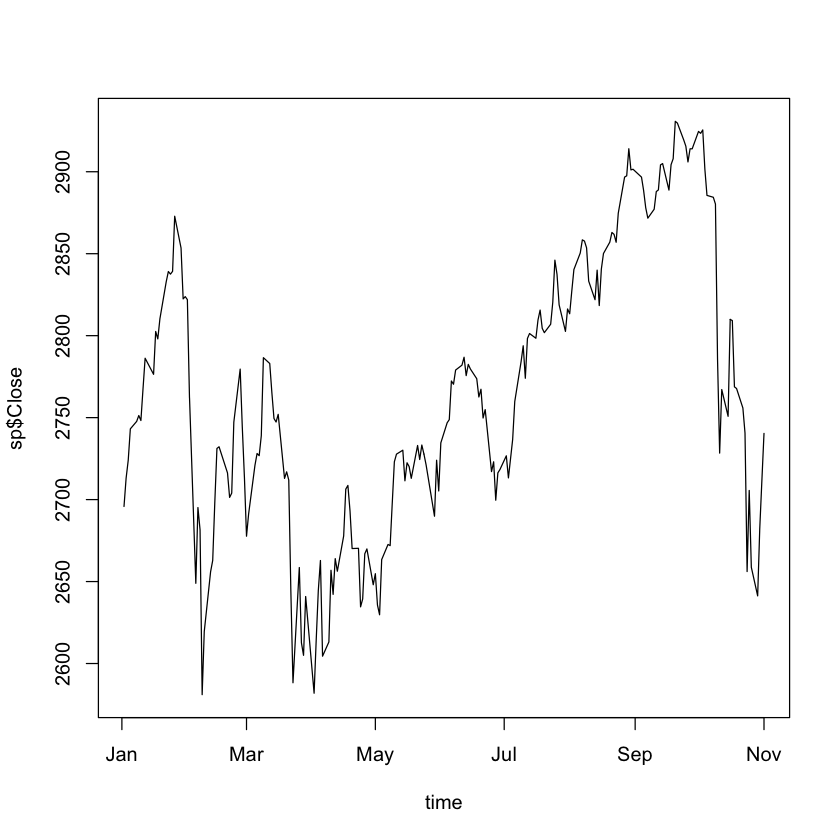

In [2]:
sp <- read.csv("GSPC.csv")
sp$Date <- as.Date(sp$Date, "%Y-%m-%d")
plot(sp$Close ~ sp$Date, xlab = "time", type ="l")

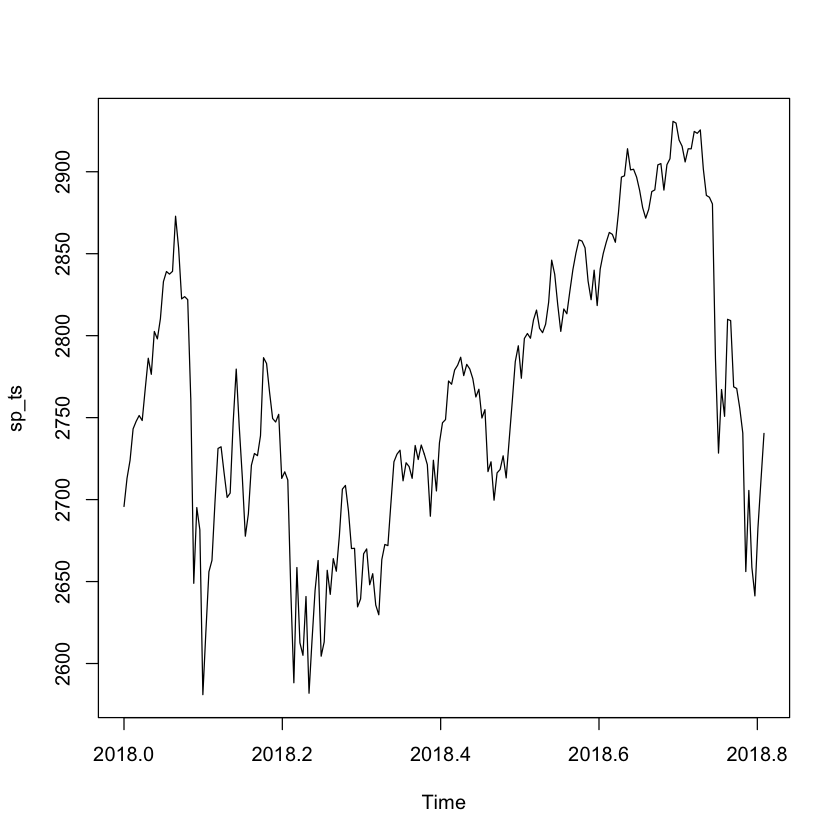

In [3]:
sp_ts <-ts(sp$Close, frequency=261, start=c(2018, 1, 1)) 
plot(sp_ts)

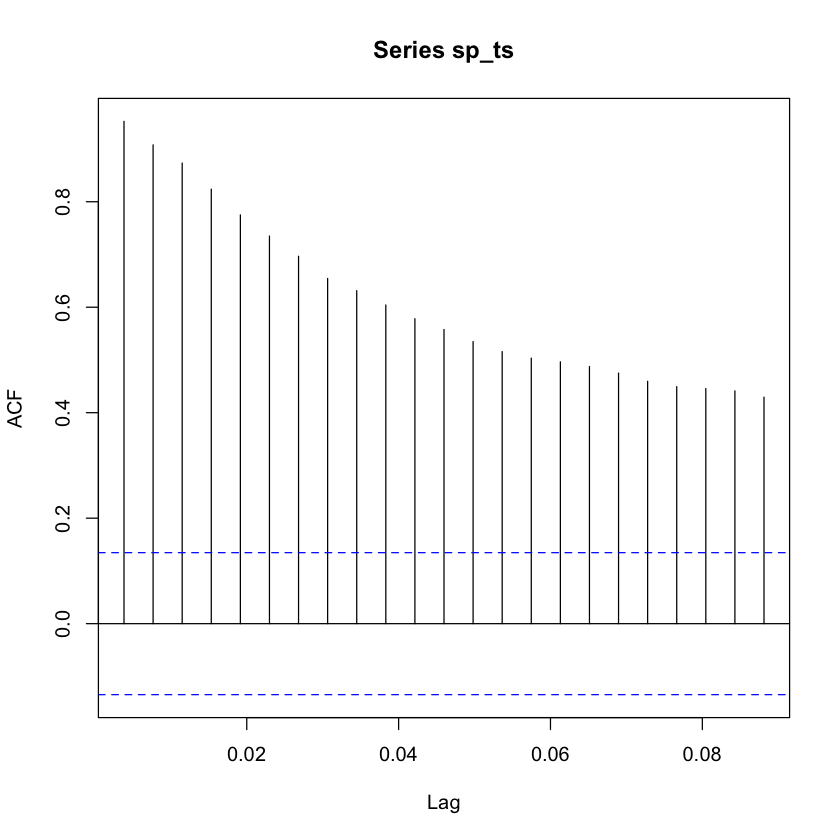

In [5]:
# Ploting acf for the data
acf(sp_ts)

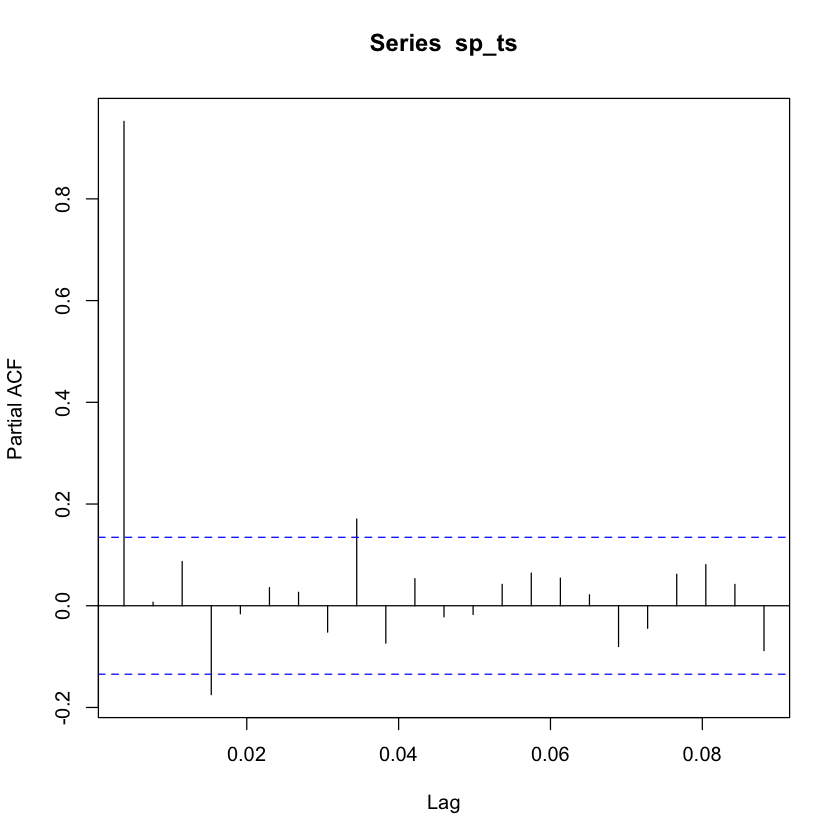

In [6]:
# ploting pacf for our data
pacf(sp_ts)

In [7]:
# ploting eacf 
eacf(sp_ts)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x x x x x x x  x  x  x 
1 o o x o o o o x o o o  o  o  o 
2 o o x o o o o x o o o  o  o  o 
3 x x x o o o o o o o o  o  o  o 
4 o x x o o o o o o o o  o  o  o 
5 x o o o o o o o o o o  o  o  o 
6 x x o o x o o x o o o  o  o  o 
7 x o x o x x o x o o o  o  o  o 


Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“10  linear dependencies found”

Reordering variables and trying again:


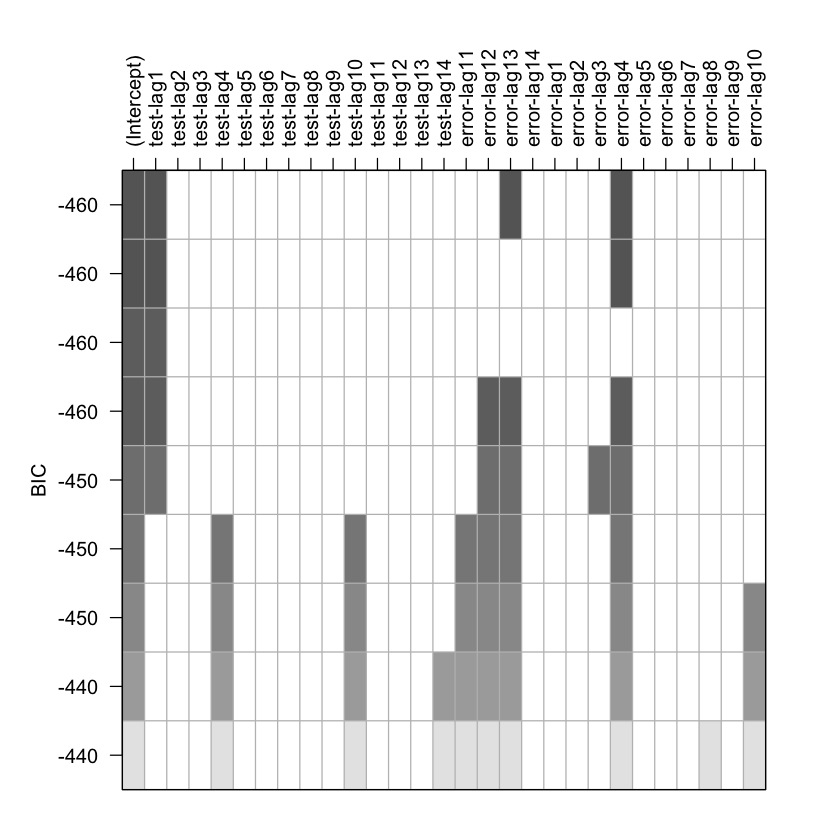

In [9]:
# plot BIC
plot(armasubsets(y=sp_ts,nar=14,nma=14,y.name='test',ar.method='ols'))

#### From our exploratory analysis, we realize that our data seems stationary after taking the first differen, so we will also plot multiple acfs for our data after taking first difference

In [14]:
# taking the first difference
sp_diff = diff(sp_ts,lag = 1)

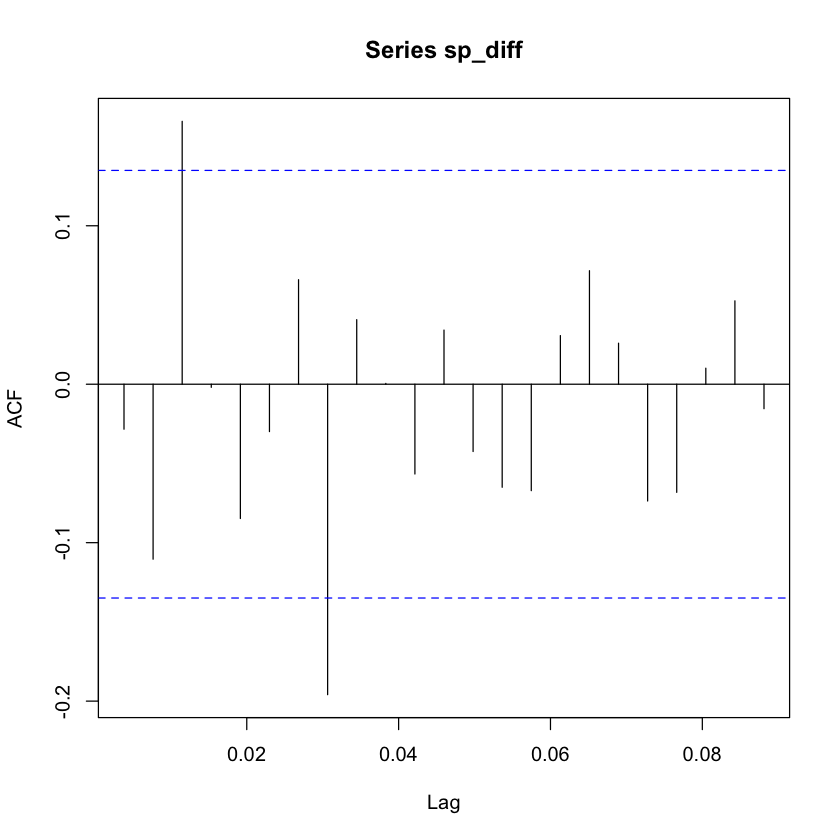

In [17]:
# plot acf for the first difference
acf(sp_diff)

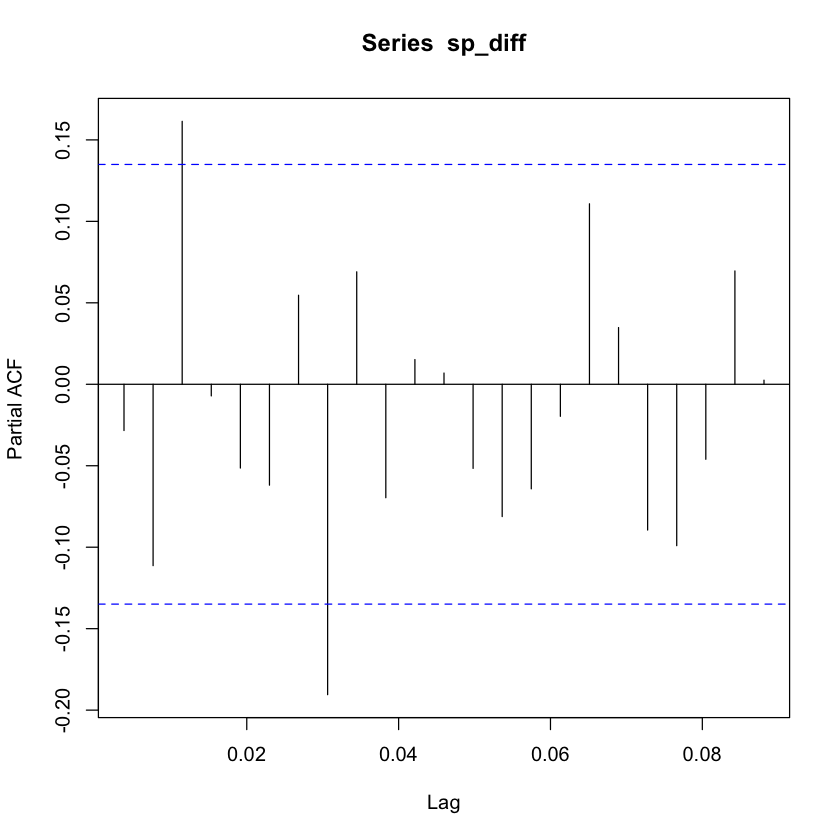

In [15]:
# plot pacf for the first difference
pacf(sp_diff)

In [16]:
# plot eacf for the first difference
eacf(sp_diff)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o x o o o o x o o o  o  o  o 
1 x o x o o o o x o o o  o  o  o 
2 x x o o o o o x o o o  o  o  o 
3 o x x o o o o x o o o  o  o  o 
4 o o x o o o o x o o o  o  o  o 
5 x x o o x o o x o o o  o  o  o 
6 x x x o x o o x o o o  o  o  o 
7 x x x o x o o o o o o  o  o  o 


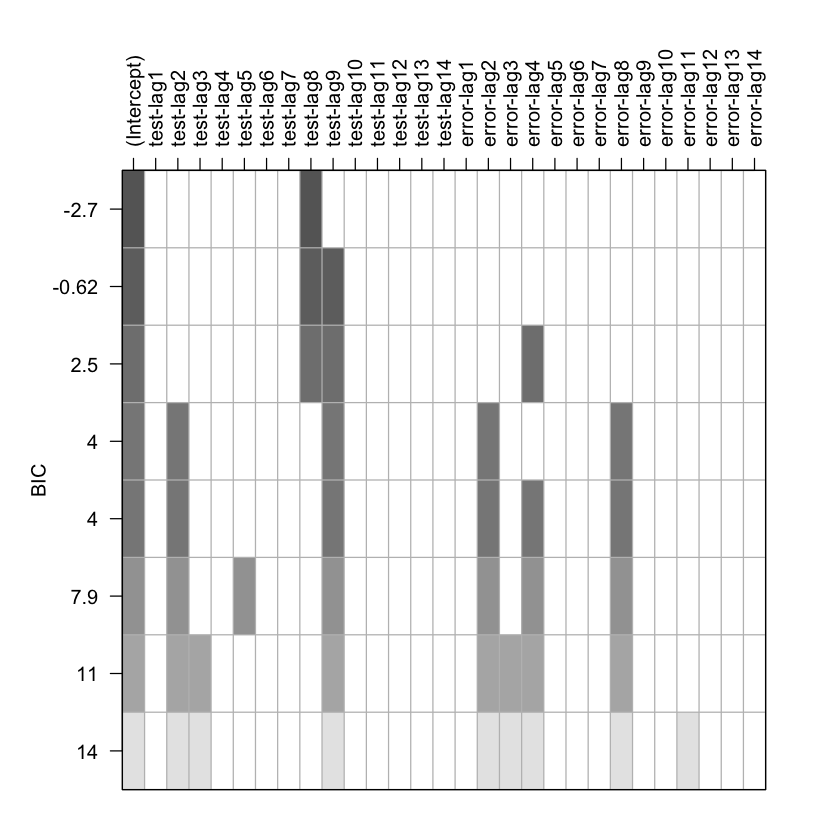

In [18]:
# plot BIC
plot(armasubsets(y=sp_diff,nar=14,nma=14,y.name='test',ar.method='ols'))

#### After taking the first difference, our data looks more stationary, so we decide to use this new data and fit our model. After looking into different plots, we came up with some candidates for our model: AR 1 with seasonality of 8 and AR 8 